In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as sm
from scipy import stats

import statsmodels as sm
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols


from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression

import folium
from folium import plugins
from IPython.display import HTML, display

# Data Cleaning

In [4]:
# importing the csv dataset and printing out the first ten rows 
df_raw = pd.read_csv('kc_house_data.csv')
df = df_raw
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# printing out all information for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# as we see:
# sqft_basement    21420 non-null object

print('Value of sqft_basement: {} and of type: {}'.format(df['sqft_basement'][0], type(df['sqft_basement'][0])))


Value of sqft_basement: 0.0 and of type: <class 'str'>


In [7]:
# change date to datetime; data over 1 year
df['date']= pd.to_datetime(df['date']) 

# relative days since first entry column
df['rel_date'] = df['date'] - df['date'].min()
df['rel_date'] = pd.to_numeric(df['rel_date'].dt.days, downcast='integer')


print('first date in imported data: {}'.format(df['date'].min().date()))
print('last date in imported data: {}'.format(df['date'].max().date()))

first date in imported data: 2014-05-02
last date in imported data: 2015-05-27


In [8]:
# df['sqft_basement'].map(lambda x: float(x))
#####---- Error regarding '?'
print("There are: {} '?' in the sqft_basement column".format(df['sqft_basement'].isin(['?']).sum()))

There are: 454 '?' in the sqft_basement column


In [11]:
# checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
rel_date            0
dtype: int64

In [12]:
df['date']= pd.to_datetime(df['date']) 



In [13]:
# there are some missing values for waterfront
df['waterfront'].unique()
# filling missing values with 0
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].unique()


array([0., 1.])

In [14]:
# filling missing values with 0
df['view'].unique()
df['view'] = df['view'].fillna(0)

In [15]:
# filling missing values for renovated houses and putting them as 0 too
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] .unique()


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
# also the square_basement feature seems to be an object
# and there are some question marks. Assuming those mean that no basement exists we are setting them to 0

# df['fl_sqft_basement'] = df['sqft_basement'].astype(float)
#####---- Error regarding '?'

print("There are: {} '?' in the sqft_basement column".format(df['sqft_basement'].isin(['?']).sum()))

There are: 454 '?' in the sqft_basement column


In [17]:

df['sqft_basement'].value_counts()
df['sqft_basement'] = df['sqft_basement'].fillna(0)

# changed the type from object to float
df['sqft_basement'] = df['sqft_basement'].replace({'?': 0})
df['sqft_basement'].astype(float)
df['fl_sqft_basement'] = df['sqft_basement'].astype(float)
df.drop('sqft_basement', axis = 1, inplace = True)

In [18]:
# clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                  21597 non-null int64
date                21597 non-null datetime64[ns]
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
rel_date            21597 non-null int16
fl_sq

In [19]:
# check for duplicates
# there are 177 house that have been sold twice (or more)
id_len = len(df['id'].unique())
x = len(df) - id_len
x

177

In [20]:
# one of them has been sold  three times
# first five values
df['id'].value_counts().head()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

In [21]:
# peeking at the house sold three times
unique_3_initial = df.loc[df['id'] == 795000620]
unique_3_initial

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,145,0.0
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,227,0.0
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,313,0.0


In [22]:
# created a new Dataframe with unique values and last price for the double houses.
df_unique = df.drop_duplicates(subset = 'id', keep = 'last')

# peeking at the same house again the in the unique dataset 
df_unique.loc[df_unique['id'] == 795000620]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,313,0.0


In [23]:
def duplicates(df):
    """This function takes in a dataframe as an input and checks 
    for duplicates, if duplicates are found it returns as its 
    output a new dataframe with the columns ['id', 'repeated ,
    'lat','long'] """
    
    data_len = len(df)
    unique_len = len(df['id'].unique())
    duplicate_dict = dict()
    
    # check for duplicates
    if data_len == unique_len:
        print("No duplicate ids found in data")
    
    else:
        print("Duplicate ids found!!  Total number of duplicate entries : {}".format(data_len - unique_len))
        duplicate_ids = np.array(list(df.loc[df['id'].duplicated()]['id']))
        
        # gather data about duplicates
        for ids in duplicate_ids:
            duplicate_dict.update({ids : len(df.loc[df['id'] == ids])})
            duplicate_dict
       
        #assign duplicates to a new df and reindex
        duplicate_df = pd.DataFrame.from_dict(data = duplicate_dict, orient = 'index',columns=['repeated'])
        duplicate_df.sort_values(by = ['repeated'], inplace=True, ascending=False)
        duplicate_df.reset_index(inplace=True)
        duplicate_df.columns = ['id', 'repeated']
        duplicate_df
        
        lat = []
        long = []
        
        #gather the lat long data from the input and return them 
        for ids in duplicate_df['id']:
            
            lat.append(list(df.loc[df['id'] == ids]['lat']).pop())
            long.append(list(df.loc[df['id'] == ids]['long']).pop())
           
        duplicate_df['lat'] = lat
        duplicate_df['long'] = long

        return duplicate_df
    
duplicate_df = duplicates(df)
duplicate_df



Duplicate ids found!!  Total number of duplicate entries : 177


,id,repeated,lat,long
0,795000620,3,47.5045,-122.330
1,6021501535,2,47.6870,-122.386
2,3935900232,2,47.7114,-122.284
3,1217000340,2,47.4550,-122.350
4,9238500040,2,47.7735,-122.133
...,...,...,...,...
171,2621600015,2,47.3865,-122.217
172,2206700215,2,47.5660,-122.140
173,2787460720,2,47.4046,-122.181
174,3883800011,2,47.4987,-122.341


In [24]:
repeated = []

for ids in df_unique['id']:
    if duplicate_df['id'].isin([ids]).sum() != 0:
        repeated.append(list(duplicate_df.loc[duplicate_df['id'] == ids]['repeated']).pop())
    
    
    else:
        repeated.append(1)

In [25]:
df_unique['sold_twice'] = repeated

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_unique
df = df_unique
df

# This is our cleaned data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement,sold_twice
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,164,0.0,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,221,400.0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,299,0.0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,221,910.0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,292,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,19,0.0,1
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,297,0.0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,52,0.0,1
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,259,0.0,1


In [27]:
# how many zipcodes are there
len(df['zipcode'].unique())

70

In [28]:
# importing cities to replace zipcodes

data_zip = pd.read_html ('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')
final_zip = pd.concat([data_zip[2],data_zip[3],data_zip[4]])

final_zip.drop('County',axis = 1, inplace = True)
final_zip.rename(columns={'Zip Code':'zipcode'}, inplace=True)
# found duplicates in zipcodes
final_zip['zipcode'].value_counts()



98004    5
98148    5
98155    5
98198    4
98168    4
        ..
98224    1
98002    1
98005    1
98006    1
98050    1
Name: zipcode, Length: 108, dtype: int64

In [29]:
# dropping the duplicates of zipcodes as mostly are from Seattle -- 54
final_zip = final_zip.drop_duplicates(subset = 'zipcode', keep = 'last')
len(final_zip)

# merging the unique values of zipcodes with our dataframe
df = pd.merge(df,final_zip,on='zipcode',how='left')
len(df)
df.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
rel_date              0
fl_sqft_basement      0
sold_twice            0
City                196
dtype: int64

In [30]:
# singling out the cities left with no City associated and luckily it's only 98077
# 
missing_zip = df.loc[(df['City'].isnull())]
missing_zip['zipcode'].value_counts()

98077    196
Name: zipcode, dtype: int64

In [31]:
# Googled zipcode associated with Woodinville and replaced it where missing
missing_zip.loc[missing_zip['City'].isnull(), 'City'] = 'Woodinville'
# doing the same directly on merged
df.loc[df['City'].isnull(), 'City'] = 'Woodinville'

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
# checking we have no missing values for cities
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
rel_date            0
fl_sqft_basement    0
sold_twice          0
City                0
dtype: int64

In [33]:
# DATA FRAME WITH SOME INITIAL DATA CLEANING PLUS CITIES
df
# OUR CLEANED DF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement,sold_twice,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,164,0.0,1,Tukwila
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,221,400.0,1,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,299,0.0,1,Bothell
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,221,910.0,1,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,292,0.0,1,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,98103,47.6993,-122.346,1530,1509,19,0.0,1,Seattle
21416,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,98146,47.5107,-122.362,1830,7200,297,0.0,1,Seattle
21417,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,98144,47.5944,-122.299,1020,2007,52,0.0,1,Seattle
21418,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,98027,47.5345,-122.069,1410,1287,259,0.0,1,Issaquah


In [34]:
# plot their location on a map 
m = folium.Map([df_unique['lat'][0], df_unique['long'][0]], zoom_start=9)

locations = df_unique[['lat', 'long']].values
m.add_child(plugins.HeatMap(locations, radius=15))

# 1. What cities are there the most expensive houses in the State of Washington?

In [41]:
# refining the names 
df['City'].unique()

array(['Tukwila', 'Seattle', 'Bothell', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Shoreline',
       'Mercer Island', 'Kent', 'Issaquah', 'Renton', 'Vashon',
       'Yarrow Point', 'Kirkland', 'Black Diamond', 'North Bend',
       'Woodinville', 'Snoqualmie', 'Enumclaw', 'Fall City', 'Carnation',
       'Medina'], dtype=object)

In [42]:
# changing some names
df.loc[((df['City']=='Lk Forest Park') | (df['City']== 'Lk Forest Pk')), 'City']='Lake Forest Park'

In [43]:
df['City'].unique()
# grouping by cities by their average
city_plotting = df.groupby('City').agg(Av_price=('price','mean'))
city_plotting.reset_index(inplace=True)
city_plotting.sort_values(by='Av_price',ascending= True ,inplace=True)

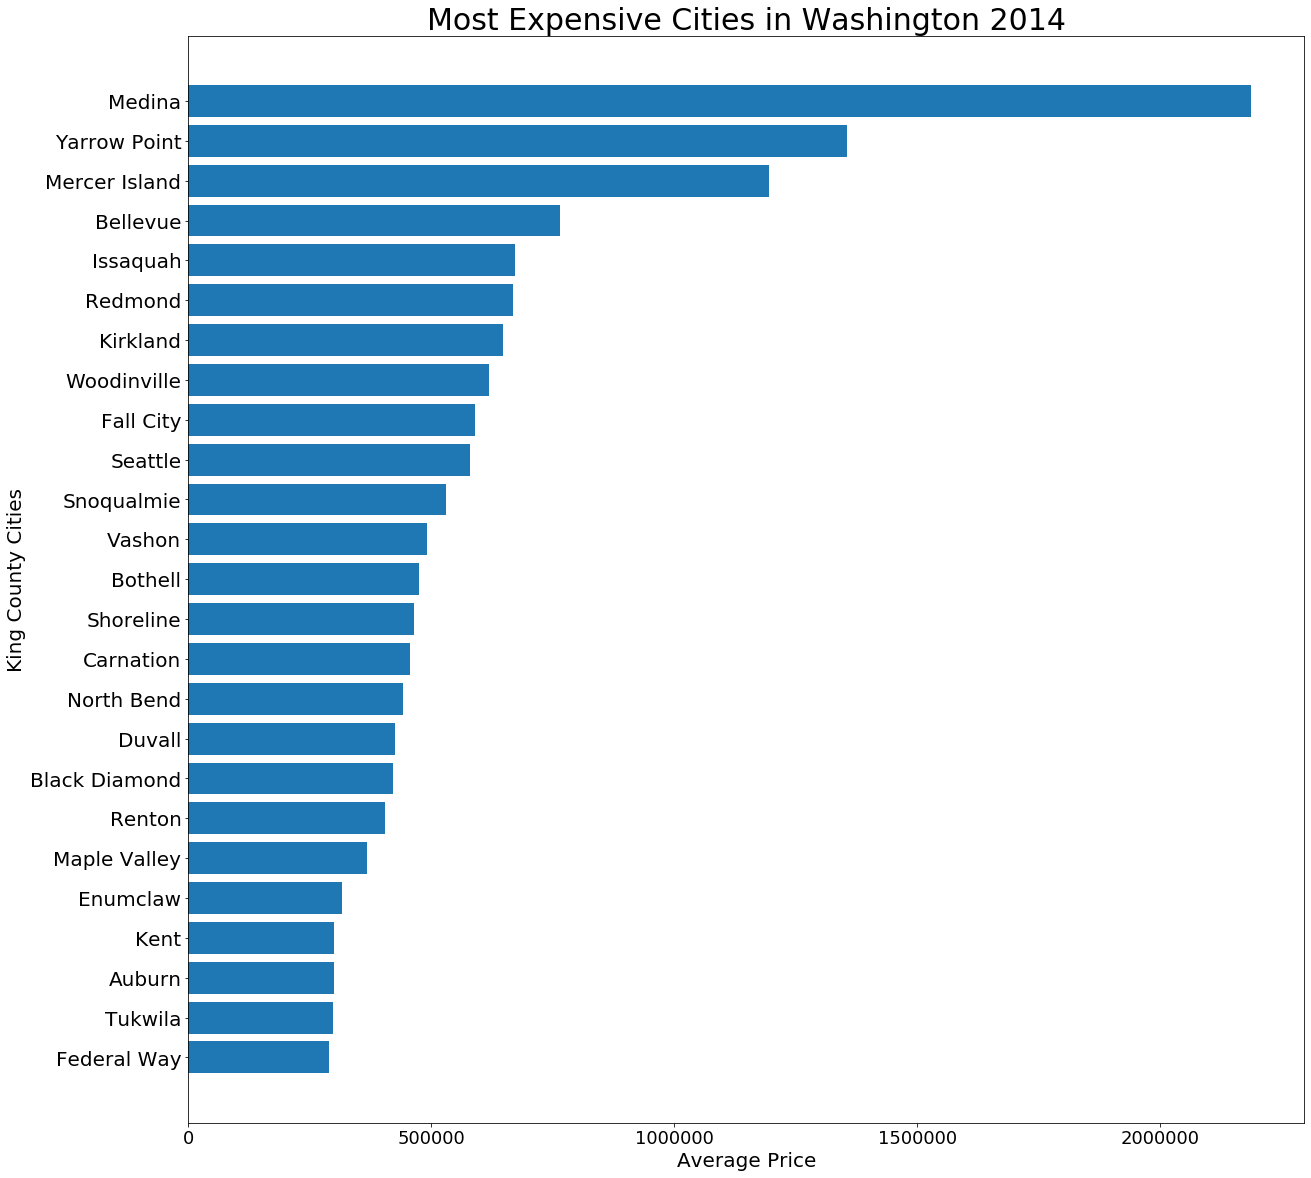

In [44]:
plt.figure(figsize=(20,20))
plt.barh(city_plotting['City'],city_plotting['Av_price'])

plt.title('Most Expensive Cities in Washington 2014', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 20)
plt.xlabel('Average Price', fontsize = 20)
plt.ylabel ('King County Cities', fontsize = 20)



plt.show()

# 2. Is there significant evidence that renovating the house increases the price?

740


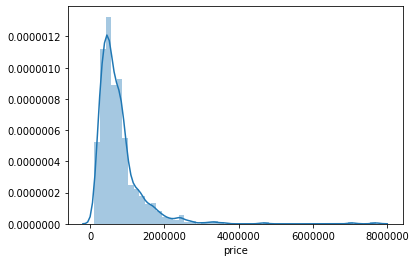

In [45]:
# finding out how many houses were renovated 
df_renovated = df.loc[df['yr_renovated'] > 0]
mean_ren = df_renovated['price'].mean()
std_ren = df_renovated['price'].std()
print(len(df_renovated))
graph_renovated = sns.distplot(df_renovated['price'])

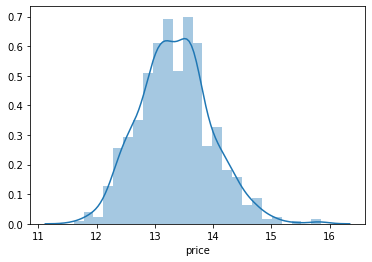

In [46]:
# tranforming renovated house into log
helpful_log_renovated = np.log(df_renovated['price'])
sns.distplot(helpful_log_renovated)
plt.show()

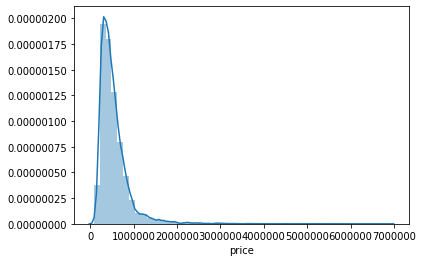

In [47]:
# creating DataFrame for houses that didn't go through renovation
df_non_renovated = df.loc[(df['yr_renovated'] == 0)| (df['yr_renovated'].isnull())]
mean_non_renovated = df_non_renovated['price'].mean()
std_non_renovated = df_non_renovated['price'].std()
len(df_non_renovated)
graph_non_renovated = sns.distplot(df_non_renovated['price'])

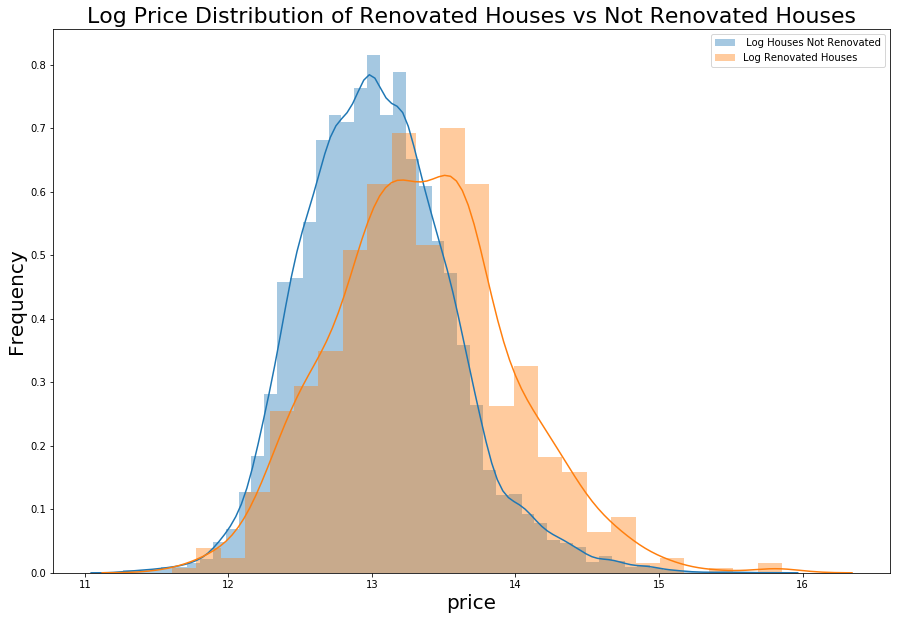

In [48]:
# transforming price into log for not renovated houses
helpful_log_non = np.log(df_non_renovated['price'])


fig,ax = plt.subplots(figsize = (15,10))
plt.title('Log Price Distribution of Renovated Houses vs Not Renovated Houses', fontsize = 22)
ax.set_xlabel('price', fontsize= 20)
ax.set_ylabel('Frequency', fontsize= 20) 

sns.distplot(helpful_log_non, ax=ax, label = ' Log Houses Not Renovated')
sns.distplot(helpful_log_renovated, ax=ax, label = 'Log Renovated Houses')
plt.legend()
plt.show()

In [49]:
# H0 renovation has no effect whatsoever on final price
mu = np.log(df['price']).mean()

one_sample = stats.ttest_1samp(helpful_log_renovated, mu)

print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 12.998 and the p-value is 0.000.


**There seems to be a significant difference between price of renovated houses and not-renovated houses**

In [50]:
# hot encoding for renovation
# 0/nan indicates when a house has never been renovated

df['yr_renovated'].value_counts()


0.0       20680
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [51]:
renovated_houses = df.loc[df['yr_renovated']> 0]

df['renovated_y'] = renovated_houses['id'].isin(df['id']) == 1
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement,sold_twice,City,renovated_y
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,164,0.0,1,Tukwila,NaN
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,221,400.0,1,Seattle,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,299,0.0,1,Bothell,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,221,910.0,1,Seattle,NaN
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,292,0.0,1,Redmond,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,19,0.0,1,Seattle,NaN
21416,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,297,0.0,1,Seattle,NaN
21417,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,52,0.0,1,Seattle,NaN
21418,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,98027,47.5345,-122.069,1410,1287,259,0.0,1,Issaquah,NaN


In [52]:
# # manually hot encoding from true/flase to 0/1
replaced = df['renovated_y'].replace({None: 0})
final = replaced.replace({True:1})
df['renovated_he'] = final
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement,sold_twice,City,renovated_y,renovated_he
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,164,0.0,1,Tukwila,NaN,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,221,400.0,1,Seattle,True,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,299,0.0,1,Bothell,NaN,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,221,910.0,1,Seattle,NaN,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,292,0.0,1,Redmond,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,47.6993,-122.346,1530,1509,19,0.0,1,Seattle,NaN,0
21416,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,47.5107,-122.362,1830,7200,297,0.0,1,Seattle,NaN,0
21417,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,47.5944,-122.299,1020,2007,52,0.0,1,Seattle,NaN,0
21418,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,47.5345,-122.069,1410,1287,259,0.0,1,Issaquah,NaN,0


# 3. Has time had an influence on the prices of houses in King County?

In [54]:
duplicate_df = df.loc[df['sold_twice'] >= 2]

duplicate_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,rel_date,fl_sqft_basement,sold_twice,City,renovated_y,renovated_he
93,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,47.6870,-122.386,1570,4500,235,290.0,2,Seattle,NaN,0
312,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,47.5503,-122.102,3860,11244,221,1600.0,2,Bellevue,NaN,0
322,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,47.4957,-122.352,1820,7460,313,280.0,2,Seattle,True,1
342,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,47.4897,-122.240,1020,7138,241,0.0,2,Tukwila,NaN,0
367,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,47.7711,-122.341,1810,6929,326,1080.0,2,Shoreline,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,...,47.5168,-121.883,2910,5260,293,0.0,2,Snoqualmie,NaN,0
20423,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,...,47.5419,-122.271,1330,1466,213,10.0,2,Seattle,NaN,0
20479,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,47.4759,-121.734,2680,5992,332,0.0,2,North Bend,NaN,0
20588,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,47.7076,-122.342,1130,1598,367,0.0,2,Shoreline,NaN,0


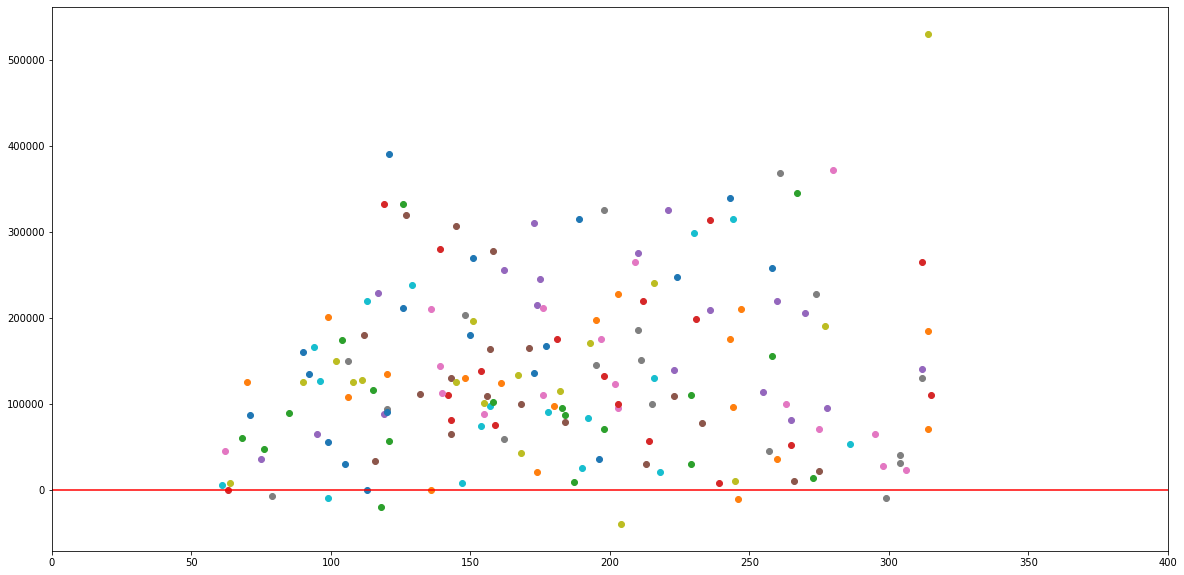

In [55]:
plt.figure(figsize=(20,10))

for ids in list(df.loc[df['sold_twice'] >=2]['id']):  
    y = list(df_raw.loc[df_raw['id'] == ids]['price'])
    price_change = y[-1]-y[0]
    x = list(df_raw.loc[df_raw['id'] == ids]['rel_date'])
    period_time = x[-1] - x[0]
    plt.scatter(period_time,price_change)
    
    
    
plt.plot([0,400],[0,0], color ='red')
plt.xlim(0,400)
plt.xlabel = 'Days since first day entry'
plt.ylabel = 'Price in USD'
plt.title = 'Prices duplicates were sold at within the same year'
plt.show()

The above graph shows how the houses that were sold more than once per year were sold at a higher price ranging up to 500,000 USD more all within the 350 days since the previous purchase was made. Anything below the red line means the second price the house as sold at was lower than the initial.

In [56]:
# single house sold 2 times or more in the same year mostly at a profit as we see above
m = folium.Map([47.6870, -122.386], zoom_start=10)

locations = duplicate_df[['lat', 'long']].values
m.add_child(plugins.HeatMap(locations, radius=7))

display(m)

# Splitting Train - Test Data

In [57]:
# setting up the predictor
target = df['price']


In [58]:
# Split that data 

df, df_test, target, target_test = train_test_split(df,target, test_size=.2, random_state= 12)
print('This is my train database', df.shape)
print('This dependant variable train', df_test.shape)
print('This is my train dependant variable',  target.shape)
print('This is my test dependant variable', target_test.shape)

This is my train database (17136, 26)
This dependant variable train (4284, 26)
This is my train dependant variable (17136,)
This is my test dependant variable (4284,)


# Exploratory Data Analysis EDA 

### corr matrix showcasing higher positive correlations in warmer colours
df.drop(['id'], axis=1).corr(method='pearson').style.format("{:.}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


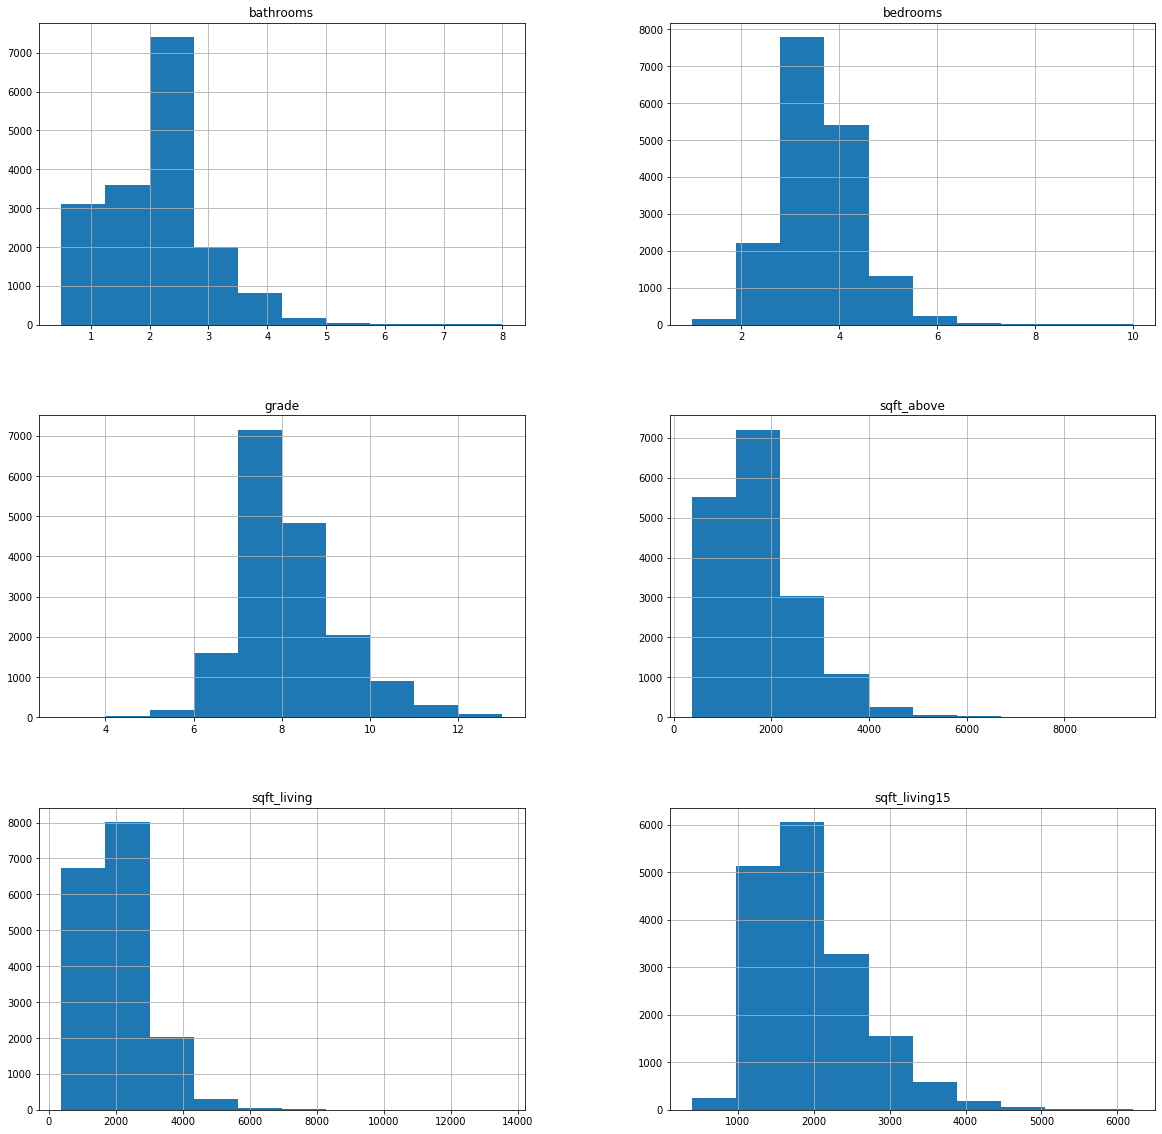

In [59]:
# checking for normality of most interesting data
df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15', ]].hist(figsize = (20,20))
plt.show()

In [60]:
# transforming all of those variables into logs



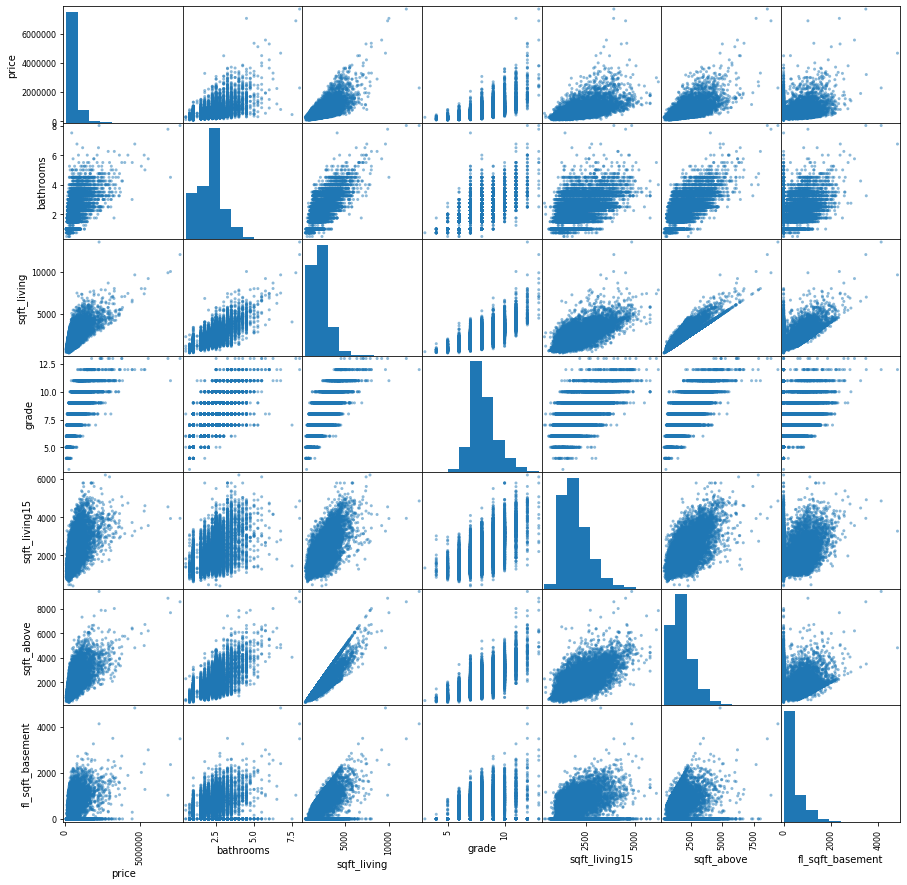

In [61]:
# checking for non-linear relationships
df_scatter = df_unique[['price', 'bathrooms','sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'fl_sqft_basement']]
df_scatter

pd.plotting.scatter_matrix(df_scatter,figsize  = [15, 15]);
plt.show()

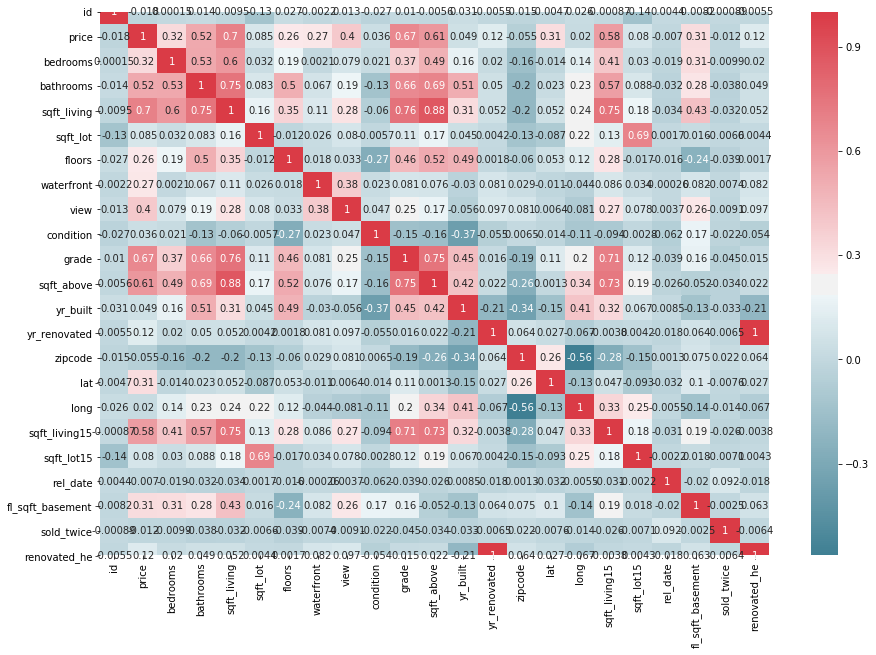

In [63]:
# Correlation map with heat map. Warmer colours show a positive correlation
_,ax=plt.subplots(figsize=(15,10))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap=colormap)

# Baseline Model Single Independant Variable Running on Loop vs Price


In [64]:
# setting up train and test data
train=df.sample(frac=0.8,random_state=200)
train.drop(['date','City', 'renovated_y', 'renovated_he' ], axis=1, inplace=True)
test=df.drop(train.index) 
print(train.shape)
print(test.shape)
print(df.shape)
# City
# renovated_y
# renovated_he

(13709, 22)
(3427, 26)
(17136, 26)


In [65]:
list(train.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'rel_date',
 'fl_sqft_basement',
 'sold_twice']

In [66]:
# Running 
import statsmodels.api as sm

r2_list = []

print('Dependant variable is: price')
print('___________')

for independent in list(train.columns):
    print('___________')
    print('Independant variable is: {}'.format(independent))
    print('')
    y = train['price']
    X = train.drop('price', axis = 1)
    X = train[independent]
    # Setting up the LEARNER
    X = sm.add_constant(X)
    model_sm = sm.OLS(y,X)

    # Actually LEARNING
    results = model_sm.fit()

    # Evaluating performance
    r2 = results.rsquared
    r2 = r2.round(2)
    print('R2 = {}'.format(r2))

    # # Understanding the LEARNED model
    est_b = results.params
    print(est_b.round(4))
    
    r2_list.append(results.rsquared)
# bathrooms, sqft_living, grade, sqft_above, sqft_living15
# had high R2s when run against the dependant variable: 
# 'price'

Dependant variable is: price
___________
___________
Independant variable is: id

R2 = 0.0
const    545978.424
id           -0.000
dtype: float64
___________
Independant variable is: price

R2 = 1.0
const    0.0
price    1.0
dtype: float64
___________
Independant variable is: bedrooms

R2 = 0.11
const       102022.4951
bedrooms    129252.0996
dtype: float64
___________
Independant variable is: bathrooms

R2 = 0.27
const         13621.3012
bathrooms    247503.0098
dtype: float64
___________
Independant variable is: sqft_living

R2 = 0.49
const         -39524.7854
sqft_living      278.0865
dtype: float64
___________
Independant variable is: sqft_lot

R2 = 0.01
const       527511.8229
sqft_lot         0.6921
dtype: float64
___________
Independant variable is: floors

R2 = 0.06
const     281946.6990
floors    171118.2657
dtype: float64
___________
Independant variable is: waterfront

R2 = 0.07
const         5.295452e+05
waterfront    1.194859e+06
dtype: float64
___________
Independant vari

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R2 = 0.01
const           529567.1403
yr_renovated       120.5034
dtype: float64
___________
Independant variable is: zipcode

R2 = 0.0
const      3.704067e+07
zipcode   -3.721826e+02
dtype: float64
___________
Independant variable is: lat

R2 = 0.09
const   -3.779172e+07
lat      8.059454e+05
dtype: float64
___________
Independant variable is: long

R2 = 0.0
const    7.380774e+06
long     5.599156e+04
dtype: float64
___________
Independant variable is: sqft_living15

R2 = 0.34
const           -73935.8212
sqft_living15      308.5215
dtype: float64
___________
Independant variable is: sqft_lot15

R2 = 0.01
const         523663.1240
sqft_lot15         1.1389
dtype: float64
___________
Independant variable is: rel_date

R2 = 0.0
const       544133.6724
rel_date       -34.9072
dtype: float64
___________
Independant variable is: fl_sqft_basement

R2 = 0.1
const               464923.7961
fl_sqft_basement       256.7215
dtype: float64
___________
Independant variable is: sold_twice

R2 = 0.0


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:
r2_list

[0.00019281683548577622,
 1.0,
 0.10500364395081385,
 0.27348569652659716,
 0.4901452964147369,
 0.006416182099953538,
 0.06405782765183876,
 0.07347673470135985,
 0.15154136185751665,
 0.001568010820921839,
 0.43226872914506564,
 0.37182540792891805,
 0.0021004746513436645,
 0.014335411540073784,
 0.002969775281027376,
 0.09400321861988492,
 0.00046824739057038656,
 0.3351802203282417,
 0.006107035328870691,
 0.00011743754130155715,
 0.09505839548756345,
 6.906331020228862e-05]

# Model with all values together

In [68]:
y = train['price']
X = train.drop(['price', 'id'], axis = 1)
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.7
const               9.026764e+06
bedrooms           -3.965899e+04
bathrooms           4.527696e+04
sqft_living         1.231428e+02
sqft_lot            1.167000e-01
floors              9.479077e+03
waterfront          6.205473e+05
view                5.255086e+04
condition           2.885611e+04
grade               9.185700e+04
sqft_above          6.561730e+01
yr_built           -2.678834e+03
yr_renovated        2.009090e+01
zipcode            -6.148602e+02
lat                 6.151045e+05
long               -2.172023e+05
sqft_living15       1.730760e+01
sqft_lot15         -4.284000e-01
rel_date            9.382240e+01
fl_sqft_basement    2.766030e+01
sold_twice          7.273395e+04
dtype: float64


In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:51:11   Log-Likelihood:            -1.8682e+05
No. Observations:               13709   AIC:                         3.737e+05
Df Residuals:                   13688   BIC:                         3.738e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.027e+06   3.67e+06      2.462      0.014    1.84e+06    1.62e+07
bedrooms         -3.966e+04   2464.981    -16.089      0.000   -4.45e+04   -3.48e+04
bathrooms         4.528e+04   4068.263     11.129      0.000    3.73e+04    5.33e+04
sqft_living        123.1428     23.002      5.354      0.000      78.056     168.230
sqft_lot             0.1167      0.054      2.154      0.031       0.011       0.223
floors            9479.0768   4491.153      2.111      0.035     675.800    1.83e+04
waterfront        6.205e+05   2.25e+04     27.586      0.000    5.76e+05    6.65e+05
view              5.255e+04   2706.869     19.414      0.000    4.72e+04    5.79e+04
condition         2.886e+04   2955.739      9.763      0.000    2.31e+04    3.46e+04
grade             9.186e+04   2703.532     33.977      0.000    8.66e+04    9.72e+04
sqft_above          65.6173     22.972      2.856      0.004      20.588     110.646
yr_built         -2678.8336     89.926    -29.789      0.000   -2855.100   -2502.567
yr_renovated        20.0909      4.997      4.021      0.000      10.296      29.886
zipcode           -614.8602     41.158    -14.939      0.000    -695.535    -534.185
lat               6.151e+05   1.34e+04     45.811      0.000    5.89e+05    6.41e+05
long             -2.172e+05   1.64e+04    -13.281      0.000   -2.49e+05   -1.85e+05
sqft_living15       17.3076      4.309      4.017      0.000       8.862      25.753
sqft_lot15          -0.4284      0.093     -4.622      0.000      -0.610      -0.247
rel_date            93.8224     15.233      6.159      0.000      63.964     123.681
fl_sqft_basement    27.6603     22.773      1.215      0.225     -16.978      72.298
sold_twice        7.273e+04   1.89e+04      3.845      0.000    3.57e+04     1.1e+05
==============================================================================
Omnibus:                    12513.946   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1706945.550
Skew:                           3.909   Prob(JB):                         0.00
Kurtosis:                      57.104   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coeifficients all over the place

# Model with Bathrooms, Bedrooms, Grade and Sqft_above 

In [70]:
# train['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
train[['bathrooms','bedrooms', 'grade', 'sqft_above']]

,bathrooms,bedrooms,grade,sqft_above
5879,1.00,2,6,840
10840,1.00,2,7,850
4892,1.50,4,5,1730
19917,3.00,3,8,1710
10534,2.75,4,7,1350
...,...,...,...,...
3729,2.75,4,7,2070
6239,1.75,3,7,1090
11352,2.25,4,8,2860
16739,2.00,4,7,2180


In [71]:
X = train[['bathrooms','bedrooms','sqft_living', 'grade', 'sqft_above']]
y = train['price']

X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.54
const         -480713.5740
bathrooms      -24064.3120
bedrooms       -44560.9735
sqft_living       277.4157
grade           99951.6925
sqft_above        -67.5044
dtype: float64


# The BIG TEST! 

In [72]:
df_test["square_root_living"] = np.sqrt(df_test["sqft_living"])

# Time Since 1960 Variable 

df_test["time_since_1960"] = abs(df_test["yr_built"] - 1960)

final_features_test = df_test

X_final_test = sm.add_constant(final_features_test)
model_final_test = sm.OLS(target_test,X_final_test)
results_final_test = model_final_test.fit()

results_final_test.summary()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# undo that square thing 
df_test["square_root_living"] = np.sqrt(df_test["sqft_living"])

# Time Since 1960 Variable 

df_test["time_since_1960"] = abs(df_test["yr_built"] - 1960)

final_features_test = df_test

X_final_test = sm.add_constant(final_features_test)
model_final_test = sm.OLS(target_test,X_final_test)
results_final_test = model_final_test.fit()

results_final_test.summary()